# 5.1 Visualize Nigerian Music scraped from Spotify - an analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv("../data/nigerian-songs.csv")
df.head()


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [4]:
# Get information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [5]:
# Double-check for null values.
df.isnull().sum()


name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [6]:
# Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value
df.describe()


,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


Text(0.5, 1.0, 'Top genres')

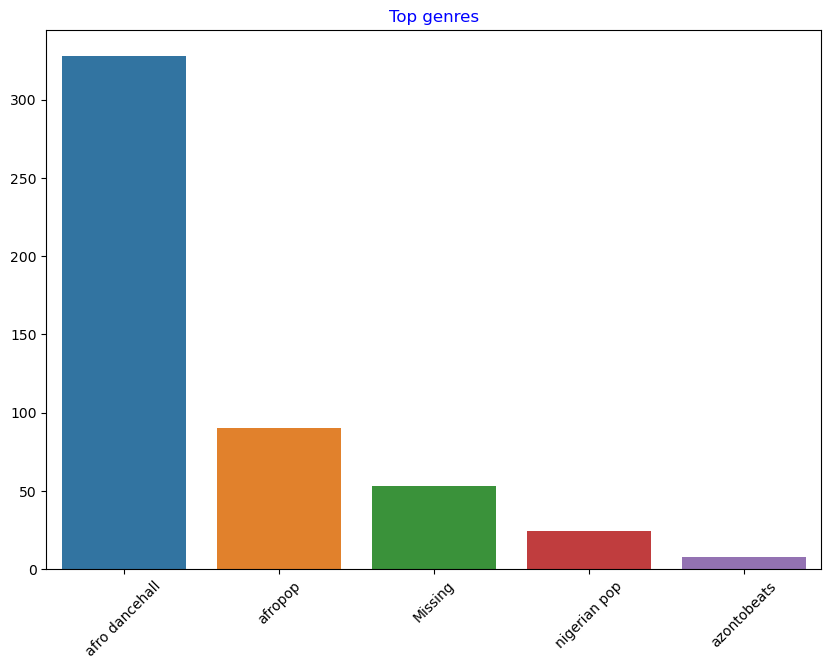

In [7]:
# Let's examine the genres. Quite a few are listed as 'Missing' which means they aren't categorized in the dataset with a genre 
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')


Text(0.5, 1.0, 'Top genres')

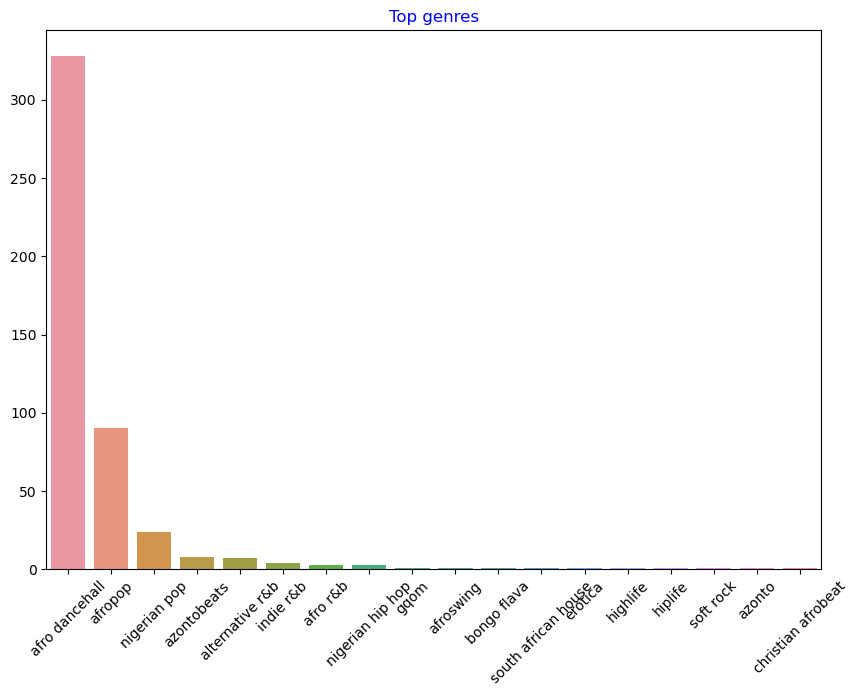

In [8]:
# Remove 'Missing' genres, as it's not classified in Spotify

df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')


Text(0.5, 1.0, 'Top genres')

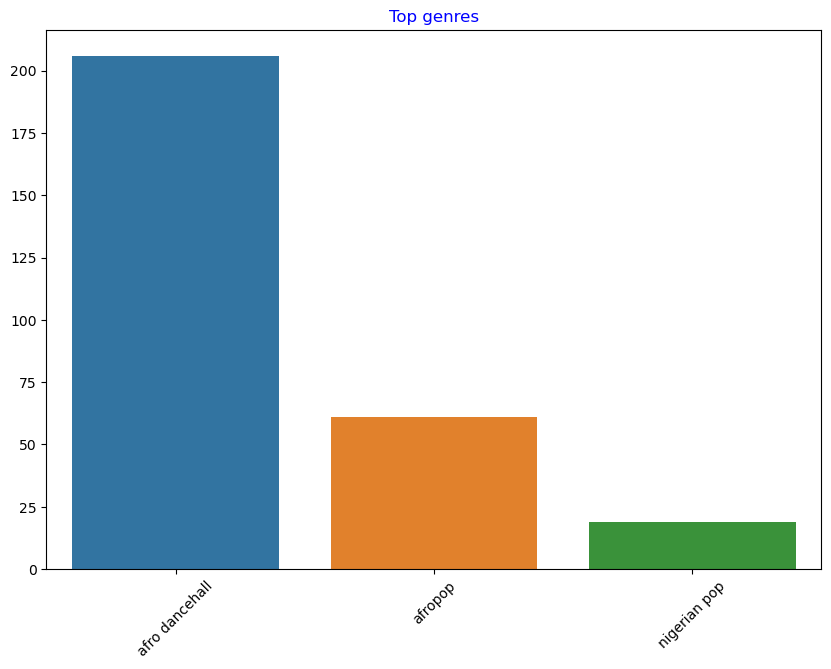

In [9]:
# The top three genres comprise the greatest part of the dataset, so let's focus on those
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

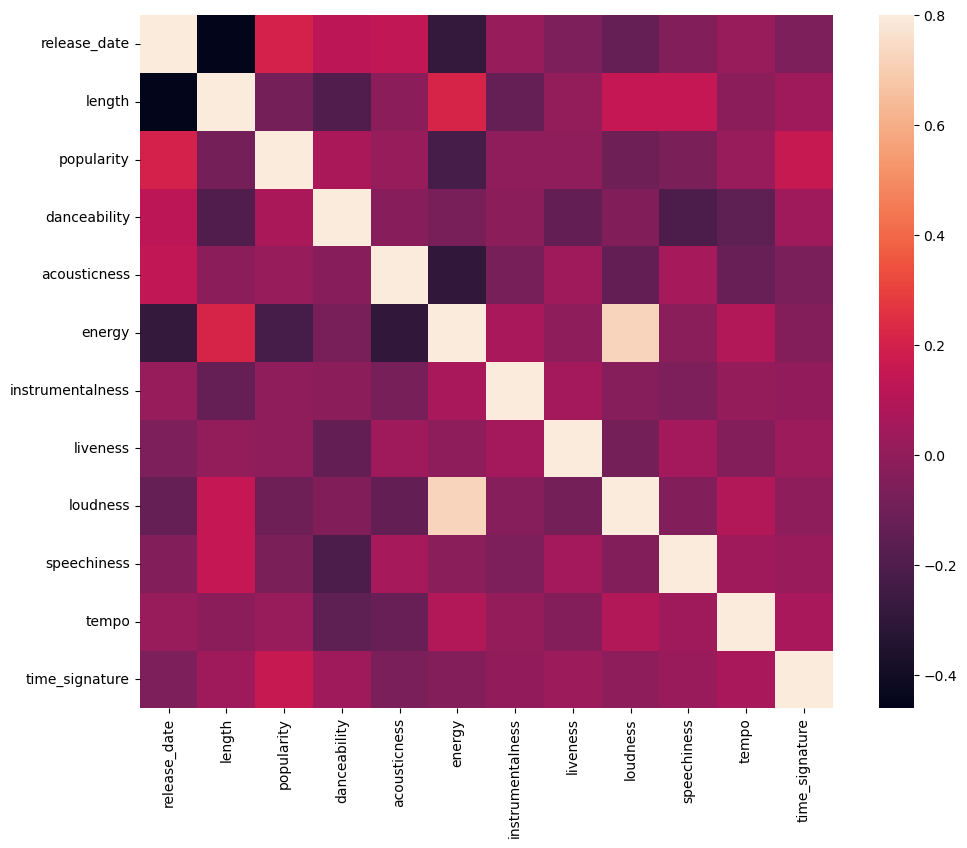

In [11]:
# The data is not strongly correlated except between energy and loudness, which makes sense. 
# Popularity has a correspondence to release data, which also makes sense, as more recent songs are probably more popular. 
# Length and energy seem to have a correlation - perhaps shorter songs are more energetic?
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

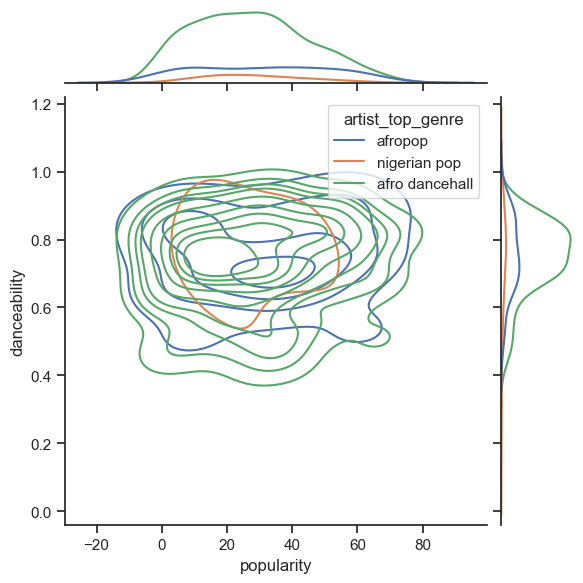

In [12]:
# Are the genres significantly different in the perception of their danceability, based on their popularity? 
# Examine our top three genres data distribution for popularity and danceability along a given x and y axis 
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

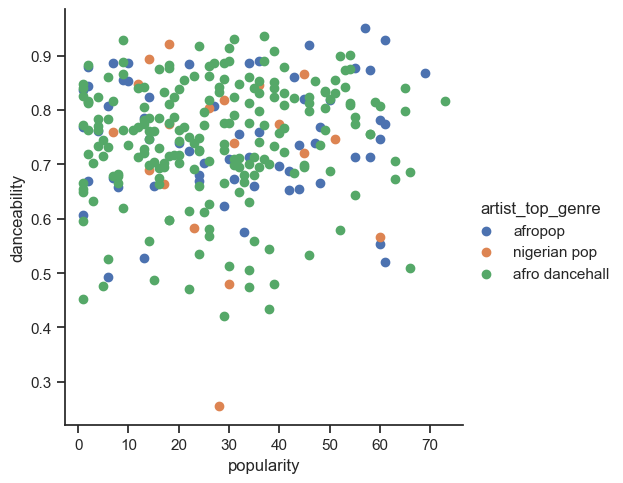

In [18]:
# In general, the three genres align in terms of their popularity and danceability.  
# A scatterplot of the same axes shows a similar pattern of convergence. 
# Try a scatterplot to check the distribution of data per genre
sns.FacetGrid(df, hue="artist_top_genre", height=5).map(plt.scatter, "popularity", "danceability").add_legend()

# 5.2 K-Means
We will focus only on 3 genres. Maybe we can get 3 clusters built. But how clean is our data? 

Check for outliers using box plots. We will concentrate on columns with fewer outliers (although you could clean out the outliers). Boxplots can show the range of the data and will help choose which columns to use. Note, Boxplots do not show variance, an important element of good clusterable data (https://stats.stackexchange.com/questions/91536/deduce-variance-from-boxplot)

<AxesSubplot: xlabel='release_date'>

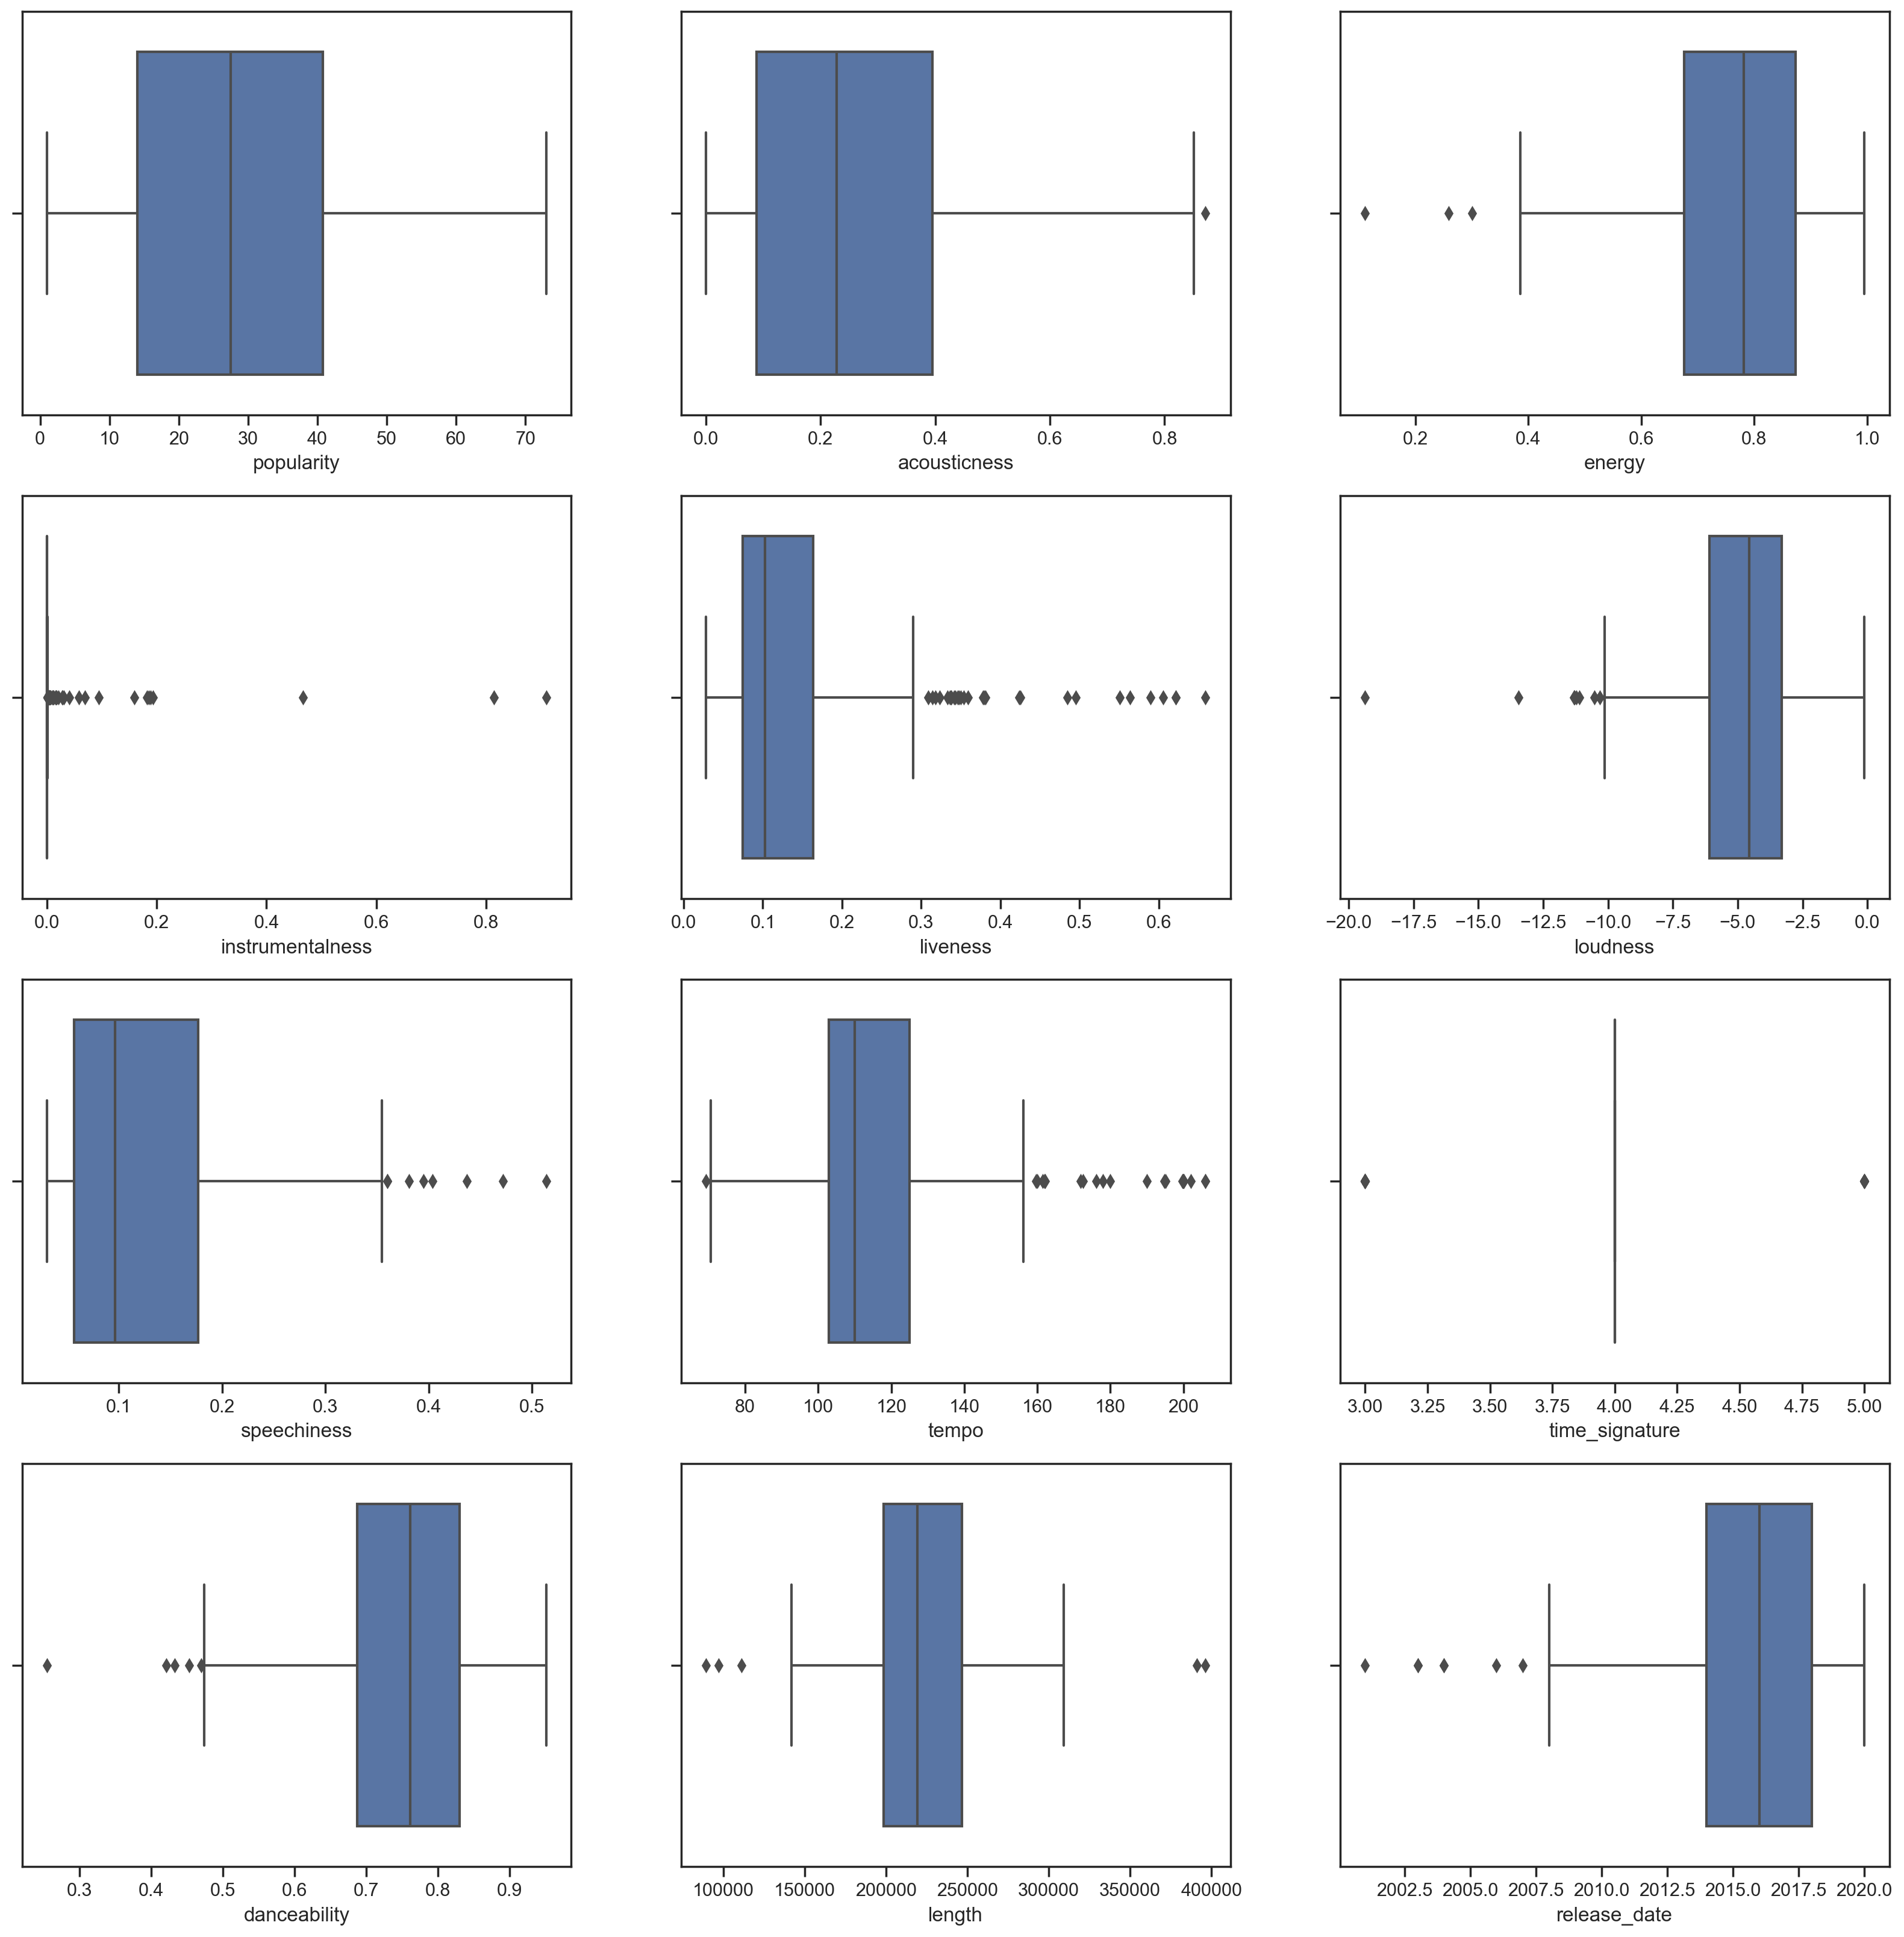

In [19]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

In [20]:
# Choose several columns with similar ranges. Make sure to include the artist_top_genre column to keep our genres straight.
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# X = scaler.fit_transform(X)

y = le.transform(y)


In [24]:
# K-Means Clustering has the drawback of needing to tell it how many clusters to build. 
# We know there are three song types, so let's focus on 3.
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

/opt/homebrew/Caskroom/miniforge/base/envs/MLME-23/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0],
      dtype=int32)

In [25]:
# Those numbers don't mean much to us, so let's get a 'silhouette score' to see the accuracy. 
# Our score is in the middle.
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [27]:
# Import KMeans and build a model
from sklearn.cluster import KMeans
wcss = []

# We'll try 10 clusters and see how the inertia changes.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

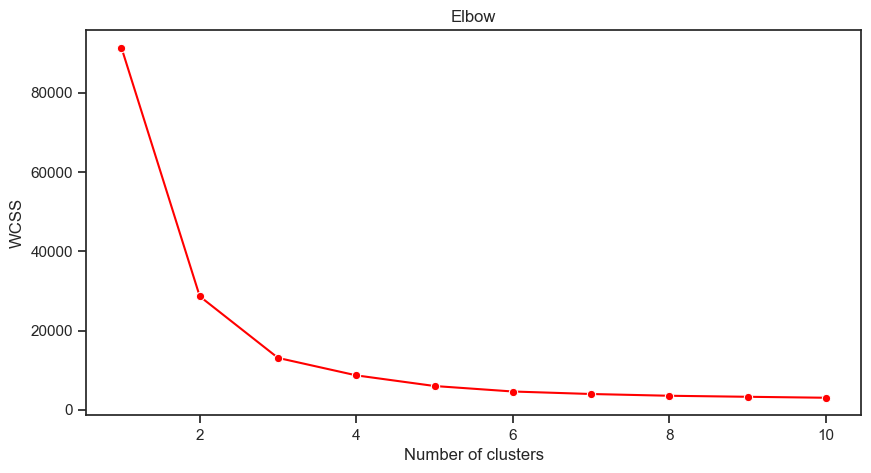

In [31]:
# Use that model to decide, using the Elbow Method, the best number of clusters to build
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looks like 3 is a good number after all. 

Fit the model again with `n_clusters=3` and create a scatterplot of your clusters. 

They do group in bunches, but they are pretty close together.

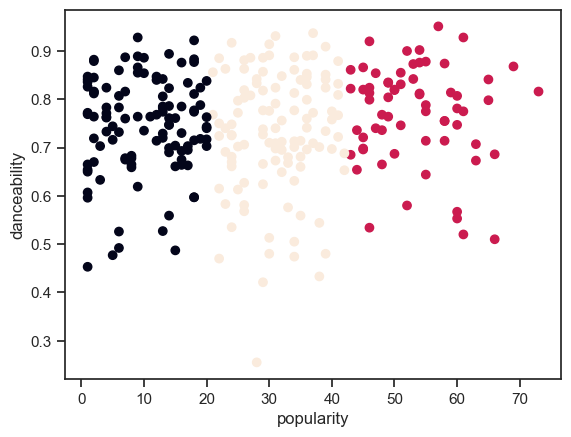

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, n_init='auto', init = 'k-means++')
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [52]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 111 out of 286 samples were correctly labeled.
Accuracy score: 0.39


This model's accuracy is not bad, but not great. 

It may be that the data may not lend itself well to K-Means Clustering. You might try a different method.


# Assignment 4: Experiments with tsne

## Steps to follow

The purpose of this lesson was to introduce you to K-Means clustering. There are times when K-Means is not appropriate for your data. Show that clustering using t-sne may work better. Note that t-sne is not exactly a clustering algorithm, but can be used to visualize high dimensional data. Following are links that may be helpful to you in documenting and explaining your findings.

- [How to use t-sne effectively](https://distill.pub/2016/misread-tsne/) 

- [t-sne tutorial](https://github.com/oreillymedia/t-SNE-tutorial) 

- [a very simple example of using t-sne with scikit](https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html)

## An example of how to document your work
I found that t-sne was able to "cluster" the images fairly well. The clusters tended to be fairly tight, and most of the images in a cluster were of the same digit. There were some clusters that were less well defined, however. For example, the cluster containing the digit '5' also contained some images of the digit '6' which looks quite similar. Overall, I found t-sne to be a fairly effective "clustering" algorithm for this dataset.



## Synthetic example from scikit doc
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE 

In [1]:
import numpy as np
from sklearn.manifold import TSNE

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X)
X_embedded

array([[-34.8952   , -12.750474 ],
       [  2.671586 , -33.87453  ],
       [ -5.6625977,  -4.6954017],
       [-26.502895 , -41.939716 ]], dtype=float32)

## t-SNE: The effect of various perplexity values on the shape
After https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

For further details, “How to Use t-SNE Effectively” https://distill.pub/2016/misread-tsne/ provides a good discussion of the effects of various parameters, as well as interactive plots to explore those effects.

In [58]:
# YOUR CODE HERE

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=3,
    init="random",
    random_state=0,
    perplexity=3,
    learning_rate="auto",
    n_iter=300,
)
# ,,,